In [1]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
import numpy as np # для математического вычисления
import pandas as pd # для работы с БД
from sklearn import preprocessing
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.simplefilter("ignore")

# Анализ данных

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_test.shape  # Информация по кол-во столбцов и строк

(36349, 18)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [5]:
df_train.head(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [7]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения default, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [8]:
data.nunique(dropna=False)

client_id           110148
app_date               121
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki            34288
bki_request_cnt         40
region_rating            8
home_address             3
work_address             3
income                1207
sna                      5
first_time               5
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [9]:
num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

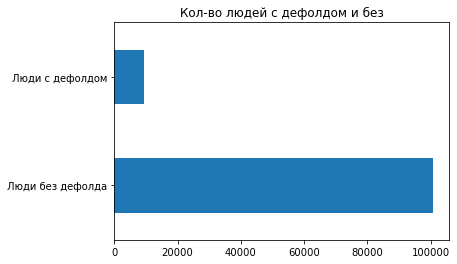

In [10]:
data['default'].replace(to_replace={0:'Люди без дефолда',1:'Люди с дефолдом'},inplace=True)
data['default'].value_counts().plot.barh()
plt.title('Кол-во людей с дефолдом и без')
plt.show()
#Воизбежание в дальнейшем ошибки возвращаем колонку в изначальное обозночение переменных
data['default'].replace(to_replace={'Люди без дефолда':0,'Люди с дефолдом':1},inplace=True)

__Как мы видем на графике людей без дефолта на много больше,чем с ним.__

# Построим графики распределения логарифмированных переменных для численных переменных.

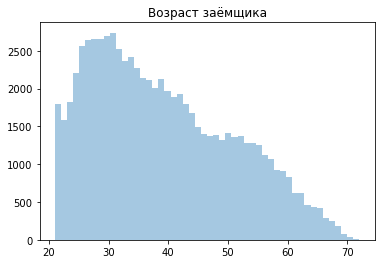

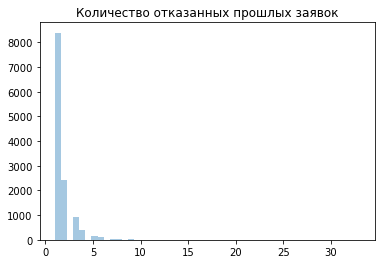

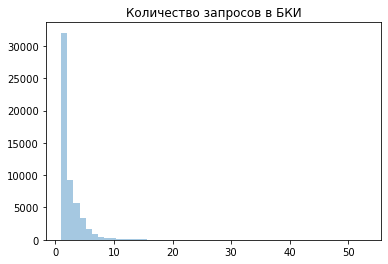

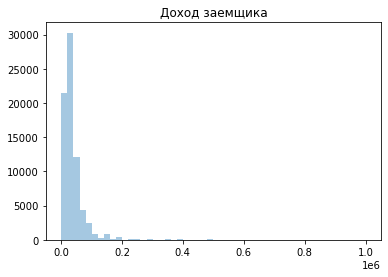

In [11]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

# числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

rus_colns = ['Возраст заёмщика', 'Количество отказанных прошлых заявок',
             'Количество запросов в БКИ', 'Доход заемщика']

train, validation = train_test_split(data, test_size=0.33, random_state=42)
for i,col in zip(num_cols,rus_colns):
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde=False, rug=False)
    plt.title(col)
    plt.xlabel('')
    plt.show()

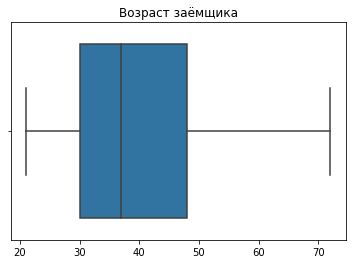

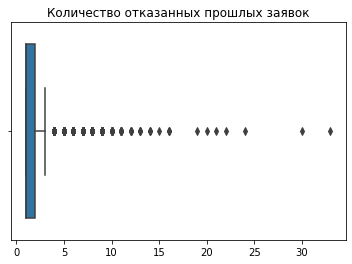

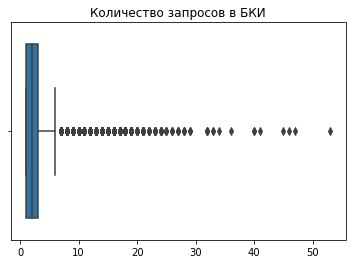

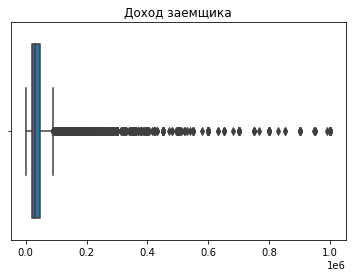

Средний возраст дефолтного клиента: 39.25
Средний показатель отмененных заявок дефолтного клиента: 0.27
Средний показатель БКИ дефолтного клиента: 2.01
Средний доход дефолтного клиента: 41012.65


In [12]:
train, validation = train_test_split(
    data, test_size=0.33, random_state=42)
for col, i in zip(rus_colns, num_cols):
    plt.figure()
    plt.title(col)
    sns.boxplot(data[i][data[i] > 0].dropna())
    plt.xlabel('')
    plt.show()
print('Средний возраст дефолтного клиента: {:.2f}'.format(
    data['age'].mean()))
print('Средний показатель отмененных заявок дефолтного клиента: {:.2f}'.format(
    data['decline_app_cnt'].mean()))
print('Средний показатель БКИ дефолтного клиента: {:.2f}'.format(
    data['bki_request_cnt'].mean()))
print('Средний доход дефолтного клиента: {:.2f}'.format(
    data['income'].mean()))

# Оценка корреляций

<AxesSubplot:>

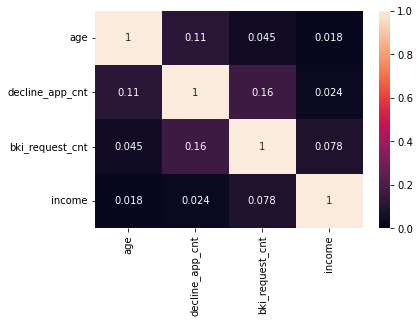

In [13]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

__Слабая корреляция между всеми признаками.__

# Значимость непрерывных переменных

<AxesSubplot:>

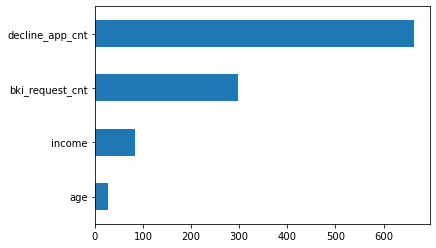

In [14]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[
                    0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

In [15]:
data['day']= pd.to_datetime(data['app_date']).dt.day
data['month']= pd.to_datetime(data['app_date']).dt.month
data['year']= pd.to_datetime(data['app_date']).dt.year
data.drop(['client_id','app_date'], axis = 1, inplace=True)

In [16]:
data = pd.get_dummies(data, columns=['education'], dummy_na=True)

In [17]:
le = preprocessing.LabelEncoder()

for column in bin_cols:
    data[column] = le.fit_transform(data[column])
    
columns = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']

for column in columns:
    data[column] = le.fit_transform(data[column])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               110148 non-null  int32  
 1   age               110148 non-null  int64  
 2   car               110148 non-null  int32  
 3   car_type          110148 non-null  int32  
 4   decline_app_cnt   110148 non-null  int64  
 5   good_work         110148 non-null  int64  
 6   score_bki         36349 non-null   float64
 7   bki_request_cnt   110148 non-null  int64  
 8   region_rating     110148 non-null  int64  
 9   home_address      110148 non-null  int64  
 10  work_address      110148 non-null  int64  
 11  income            110148 non-null  int64  
 12  sna               110148 non-null  int64  
 13  first_time        110148 non-null  int64  
 14  foreign_passport  110148 non-null  int32  
 15  sample            110148 non-null  int64  
 16  default           11

In [19]:
data

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,default,day,month,year,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,education_nan
0,1,29,1,1,0,0,-2.271884,3,3,0,...,0,22.0,3.0,2014.0,0,1,0,0,0,0
1,0,39,0,0,5,0,-1.504999,2,3,0,...,0,24.0,1.0,2014.0,0,0,0,1,0,0
2,1,50,1,1,0,0,-1.691339,1,3,0,...,0,23.0,3.0,2014.0,0,0,0,0,1,0
3,1,56,0,0,0,0,-2.374182,1,2,0,...,0,3.0,2.0,2014.0,0,0,0,1,0,0
4,0,38,0,0,0,0,-2.487502,0,6,1,...,0,4.0,2.0,2014.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,0,45,0,0,0,0,NaN,3,7,0,...,0,NaN,NaN,NaN,0,1,0,0,0,0
110144,1,41,1,1,0,0,NaN,1,7,1,...,0,NaN,NaN,NaN,0,0,0,1,0,0
110145,1,31,0,0,0,0,NaN,4,7,1,...,0,NaN,NaN,NaN,0,0,0,1,0,0
110146,0,29,0,0,0,1,NaN,3,7,0,...,1,NaN,NaN,NaN,0,0,0,1,0,0


# Подготовка данных к машинному обучению

In [20]:
data.dropna(axis=1,inplace=True)

y = data['default'].values  # наш таргет
X = data.drop(['default'], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Оценка качества модели

In [23]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33303
           1       0.50      0.00      0.00      3046

    accuracy                           0.92     36349
   macro avg       0.71      0.50      0.48     36349
weighted avg       0.88      0.92      0.88     36349



## Точноть(precision),полнота(recall) и f1-score у людей без дефолда оказался высокий показатель,чем людей которые с ним в метриках.Точность(accuracy) метрики показывает очень высокий результат.Что говорит об не очень высокой качестве данной модели.

In [24]:
confusion_matrix(y_test, y_pred)

array([[33302,     1],
       [ 3045,     1]], dtype=int64)

# Матрица ошибок определила людей без дефолда 33302 человека,а с дефолдом одного человека.Ошибкой первого рода,является 1,а второго 3045.Это говорит о слабой предсказательной способности.

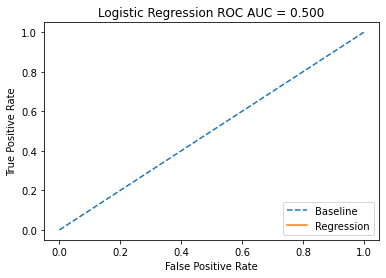

In [25]:
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(roc_auc,label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

__Средние качество модели__

## Такой показатель говорит об не очень высоком качестве модели.